# Flight Fare Prediction by Galav Bhatt

#### Import the Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Importing Dataset
Here we will import the dataset and try to explore the features associated with it!
Lets explore the instances like missing values hidden associations etc.

In [2]:
dataset = pd.read_excel(r"Data_Train.xlsx")

In [3]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
dataset["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
dataset.dropna(inplace = True)

In [7]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Exploratry Data Analysis (EDA)
From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [8]:
dataset["Journey_day"] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day

In [9]:
dataset["Journey_month"] = pd.to_datetime(dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [10]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [12]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
dataset["Dep_hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour

# Extracting Minutes
dataset["Dep_min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
dataset.drop(["Dep_Time"], axis = 1, inplace = True)

In [13]:
dataset.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [14]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time
# Assigning and converting Duration column into list
duration = list(dataset["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [15]:
# Adding duration_hours and duration_mins list to train_data dataframe

dataset["Duration_hours"] = duration_hours
dataset["Duration_mins"] = duration_mins

In [16]:
dataset.drop(["Duration"], axis = 1, inplace = True)

In [17]:
dataset.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,16,50,4,45


### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case.
**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [18]:
dataset["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

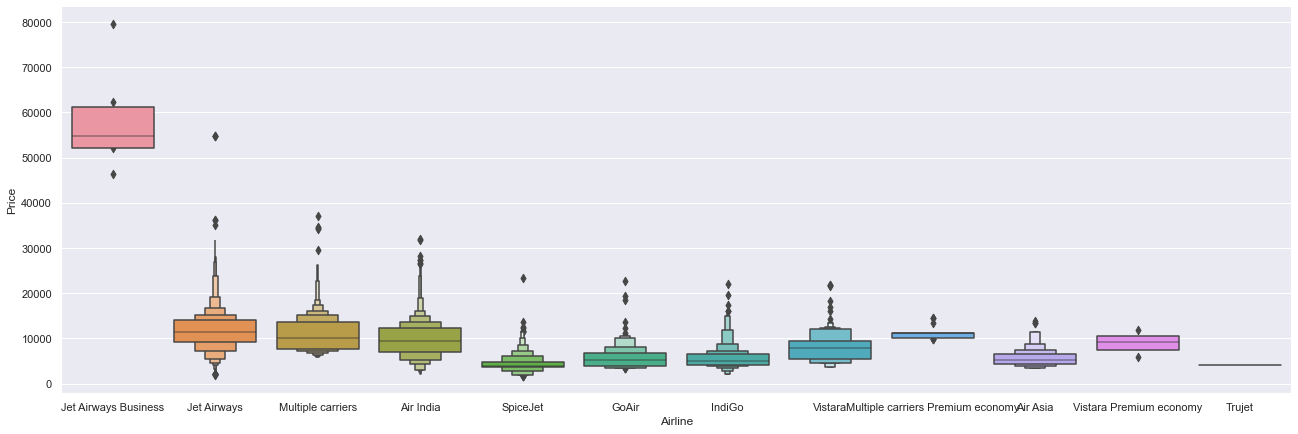

In [19]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [20]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = dataset[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
dataset["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

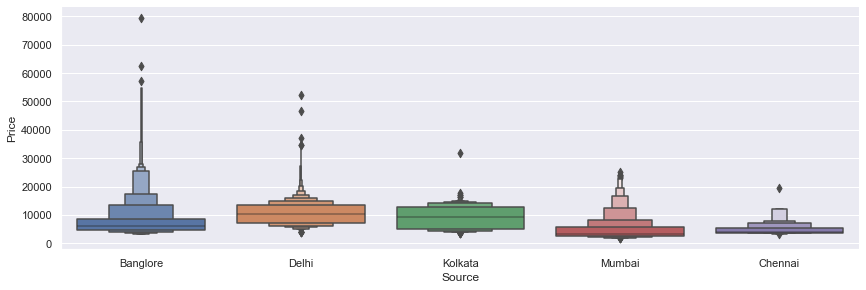

In [22]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [23]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = dataset[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
dataset["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [25]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = dataset[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [26]:
dataset["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [27]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [28]:

dataset["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [29]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [30]:
dataset.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,13:15,2,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2,13882,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,23:30,1,6218,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,21:35,1,13302,1,3,16,50,4,45


In [31]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

dataset = pd.concat([dataset, Airline, Source, Destination], axis = 1)

In [32]:
dataset.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,13:15,2,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2,13882,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,23:30,1,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,21:35,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [33]:
dataset.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [34]:
dataset.head()

,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,01:10 22 Mar,0,3897,24,3,22,20,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,13:15,2,7662,1,5,5,50,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,04:25 10 Jun,2,13882,9,6,9,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,23:30,1,6218,12,5,18,5,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,21:35,1,13302,1,3,16,50,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
dataset.shape

(10682, 29)

### Test Dataset

In [36]:
test_dataset = pd.read_excel("Test_set (1).xlsx")

In [37]:
test_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [38]:
print("Test data Info")
print("-"*75)
print(test_dataset.info())


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [39]:
print("Null values :")
print("-"*85)
test_dataset.dropna(inplace = True)
print(test_dataset.isnull().sum())

Null values :
-------------------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [40]:
test_dataset["Journey_day"] = pd.to_datetime(test_dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
test_dataset["Journey_month"] = pd.to_datetime(test_dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [41]:
test_dataset["Dep_hour"] = pd.to_datetime(test_dataset["Dep_Time"]).dt.hour
test_dataset["Dep_min"] = pd.to_datetime(test_dataset["Dep_Time"]).dt.minute
test_dataset.drop(["Dep_Time"], axis = 1, inplace = True)

In [42]:
test_dataset["Arrival_hour"] = pd.to_datetime(test_dataset.Arrival_Time).dt.hour
test_dataset["Arrival_min"] = pd.to_datetime(test_dataset.Arrival_Time).dt.minute
test_dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

In [43]:
duration = list(test_dataset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [44]:
test_dataset["Duration_hours"] = duration_hours
test_dataset["Duration_mins"] = duration_mins
test_dataset.drop(["Duration"], axis = 1, inplace = True)


In [45]:
# Categorical data

print("Airline")
print("-"*75)
print(test_dataset["Airline"].value_counts())
Airline = pd.get_dummies(test_dataset["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_dataset["Source"].value_counts())
Source = pd.get_dummies(test_dataset["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_dataset["Destination"].value_counts())
Destination = pd.get_dummies(test_dataset["Destination"], drop_first = True)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [46]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_dataset, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Shape of test data :  (2671, 28)


In [47]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


### Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,
**heatmap**
**feature_importance_**
**SelectKBest**

In [48]:
dataset.shape

(10682, 29)

In [49]:
dataset.columns

Index(['Arrival_Time', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [50]:
dataset["Arrival_hour"] = pd.to_datetime(dataset.Arrival_Time).dt.hour
dataset["Arrival_min"] = pd.to_datetime(dataset.Arrival_Time).dt.minute
dataset.drop(["Arrival_Time"], axis = 1, inplace = True)


In [51]:
X = dataset.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
y = dataset.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

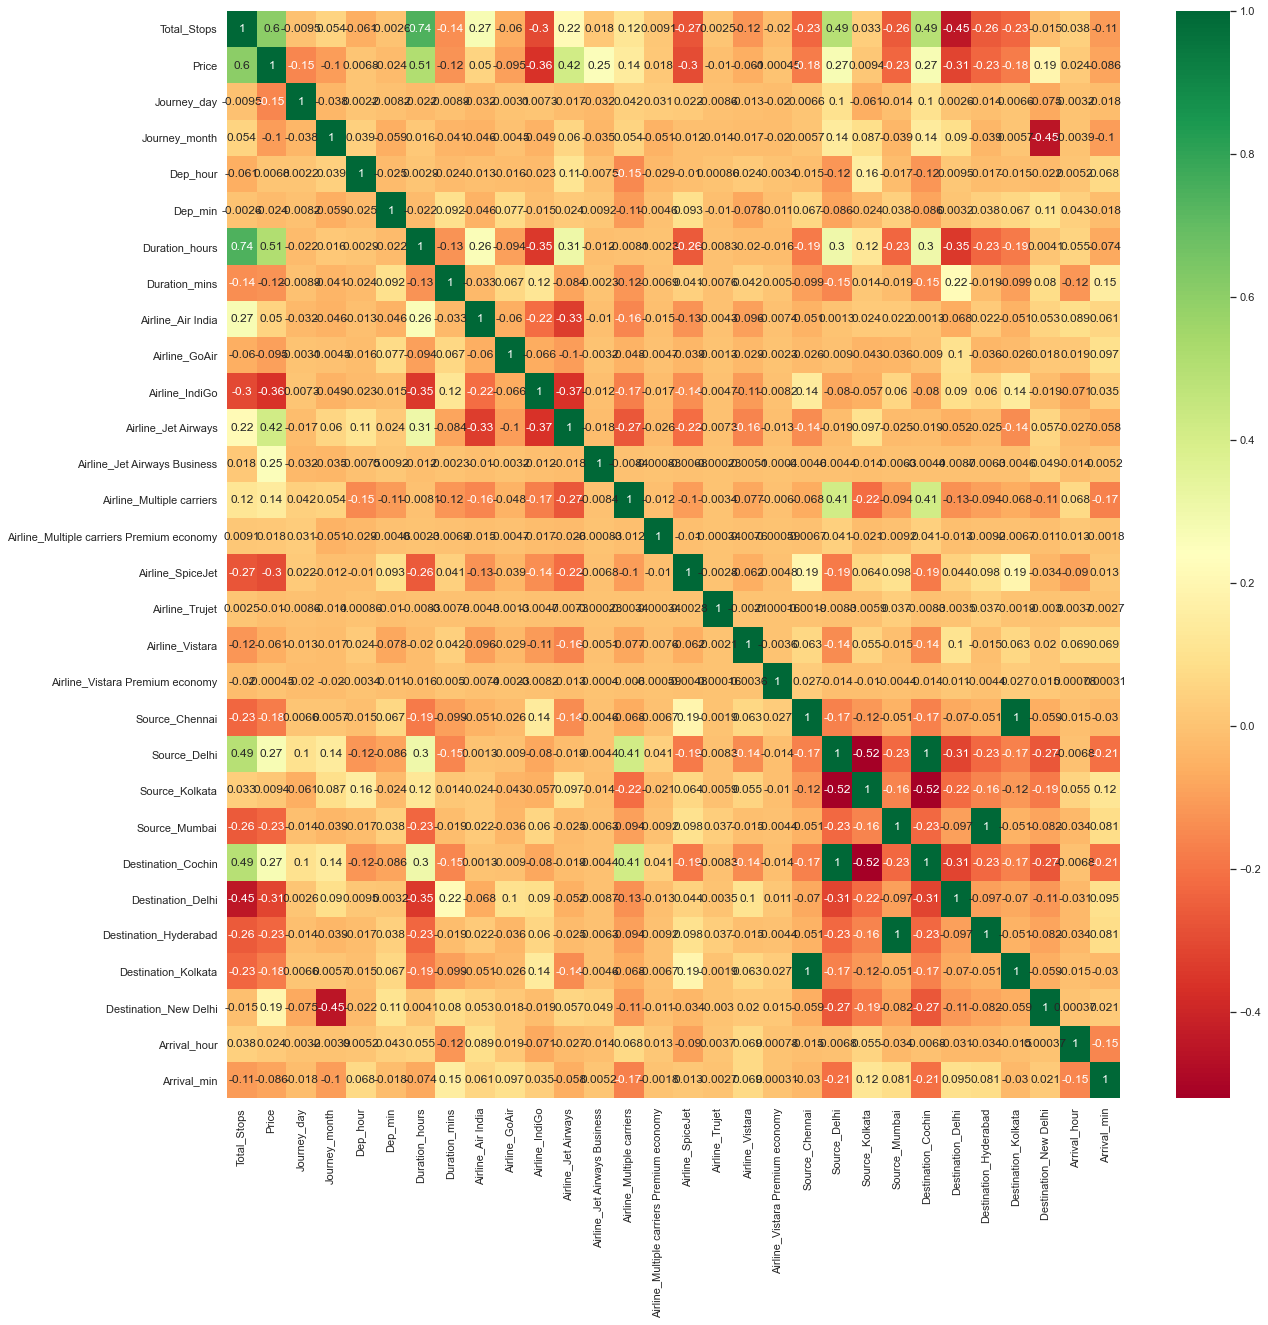

In [53]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [54]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [55]:
print(selection.feature_importances_)

[2.24908038e-01 1.42863788e-01 5.47850572e-02 2.48372068e-02
 2.09017448e-02 2.84225052e-02 1.87441429e-02 1.17529968e-01
 1.73247340e-02 1.02790603e-02 1.75118413e-03 1.68895135e-02
 1.45824979e-01 6.80638047e-02 1.89775674e-02 9.05400421e-04
 2.69069640e-03 1.33095158e-04 5.00565372e-03 9.99353390e-05
 4.59711355e-04 1.31815157e-02 3.23731039e-03 6.71682818e-03
 1.11362438e-02 1.30782145e-02 5.77420326e-03 4.02848630e-04
 2.50750502e-02]


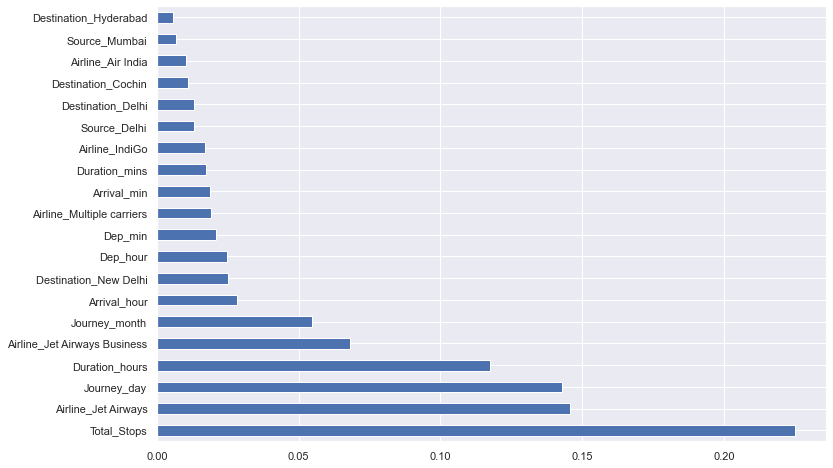

In [56]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Fitting model using Random Forest
Split dataset into train and test set in order to prediction w.r.t X_test
If needed do scaling of data
Scaling is not done in Random forest
Import model
Fit the data
Predict w.r.t X_test
In regression check RSME Score
Plot graph

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
y_pred = reg_rf.predict(X_test)

In [60]:
reg_rf.score(X_train, y_train)

0.9534027104485908

In [61]:
reg_rf.score(X_test, y_test)

0.7984358295345348

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


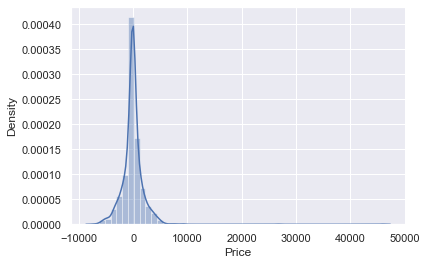

In [62]:
sns.distplot(y_test-y_pred)
plt.show()

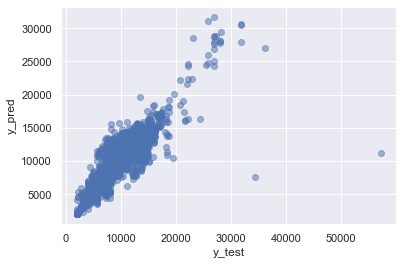

In [63]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1174.0470432843038
MSE: 4346137.996509308
RMSE: 2084.7393114030606


In [65]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [66]:
metrics.r2_score(y_test, y_pred)

0.7984358295345348

### Hyperparameter Tuning
Choose following method for hyperparameter tuning
RandomizedSearchCV --> Fast
GridSearchCV
Assign hyperparameters in form of dictionery
Fit the model
Check best paramters and best score

In [67]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [68]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [69]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [70]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [72]:
prediction = rf_random.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


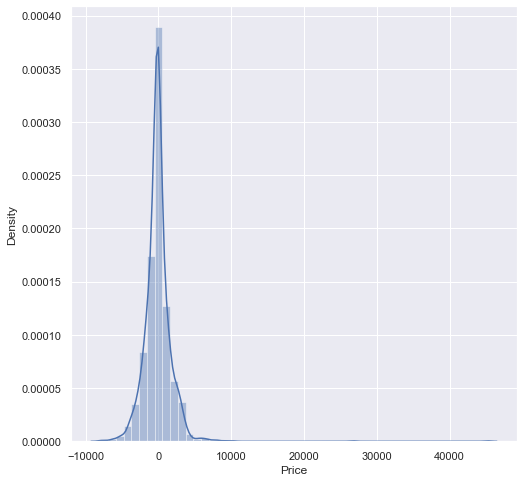

In [73]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

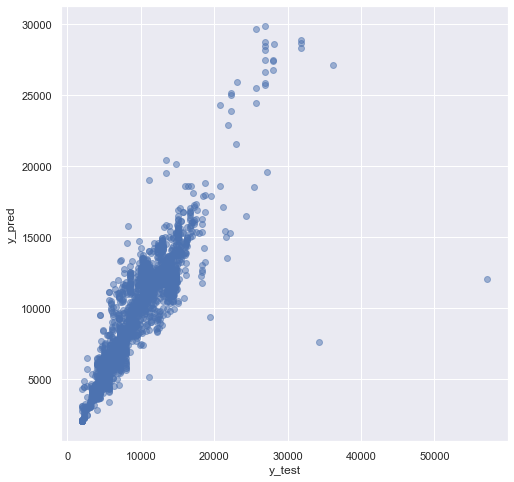

In [74]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1164.592231500069
MSE: 4050230.9737053514
RMSE: 2012.5185648101117


### Save the model to reuse it again

In [76]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [77]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [78]:
y_prediction = forest.predict(X_test)

In [79]:
metrics.r2_score(y_test, y_prediction)

0.7984358295345348